In [1]:
from scipy.stats import scoreatpercentile, ttest_1samp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os import path

from scipy.io import loadmat

from nilearn.input_data import NiftiLabelsMasker
from nilearn import plotting, surface, datasets

from utils.io import get_args, get_firstlevel_dir, get_secondlevel_dir, save_args

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
args = get_args(['-replicate'])

firstlevel_dir = get_firstlevel_dir(args)

secondlevel_dir = get_secondlevel_dir(args)
save_args(args, secondlevel_dir)

ridx, cidx = np.tril_indices(args.nROI, -1)

contrasts_files = sorted(glob(path.join(firstlevel_dir, '*.csv')))

In [3]:
contrasts_files

['results/1stlevels/dataset-1/desc-Replicate-True/model-VTCcorr_contrast-VTCcorr_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialPrecursor_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialType_contrast-common_fail_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialType_contrast-probe_fail+probe_success_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialType_contrast-probe_fail_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialType_contrast-probe_success-probe_fail_datatype-edge.csv',
 'results/1stlevels/dataset-1/desc-Replicate-True/model-trialType_contrast-probe_success_datatype-edge.csv']

In [4]:
shen_network_labels = loadmat('Shen_network_labels.mat')
network_mappings = shen_network_labels['Shen_network_labels'].flatten()
network_names = ['medialfrontal', 'frontalparietal', 'default', 'subcorticalcerebellar', 'motor', 'visual2', 'visual1', 'visualassociation']

# Secondlevels

In [5]:
shen_mask = NiftiLabelsMasker(args.atlas_loc)

_ = shen_mask.fit_transform(args.atlas_loc)

fsaverage = datasets.fetch_surf_fsaverage("fsaverage")

In [6]:
def plot_surf(est, file_out, masker=shen_mask, **plotting_kwargs):
    niimg = masker.inverse_transform([est])
    

    fig, axes = plt.subplots(2,2, subplot_kw={'projection': '3d'})
    for j, side in enumerate(['left', 'right']):
        bg_map = surface.load_surf_data(fsaverage[f"sulc_{side}"])
        for i, view in enumerate(['lateral', 'medial']):
            

            surf_data = surface.vol_to_surf(niimg,
                surf_mesh=fsaverage[f"pial_{side}"],
                inner_mesh=fsaverage[f"white_{side}"],
                interpolation='nearest'
            )

            fig = plotting.plot_surf_stat_map(
                fsaverage[f'pial_{side}'],
                surf_data,
                hemi=side,
                bg_map=bg_map,
                view=view,
                colorbar=False,
                axes=axes[i,j],
                vmax=15.05,
                **plotting_kwargs
            )

    plt.tight_layout()
    plt.subplots_adjust(
        wspace=-.35,
        hspace=-.25)
    plt.savefig(f"results/figures/{file_out}", bbox_inches="tight", dpi=400, transparent=True)
    plt.show()
    plt.close()

dataset-1_desc-Replicate-True_model-VTCcorr_contrast-VTCcorr_datatype-edge.png
# sig ROIs: 52
medialfrontal: + 1 | - 7
frontalparietal: + 1 | - 4
default: + 0 | - 9
subcorticalcerebellar: + 8 | - 5
motor: + 12 | - 0
visual2: + 2 | - 0
visual1: + 0 | - 2
visualassociation: + 1 | - 0


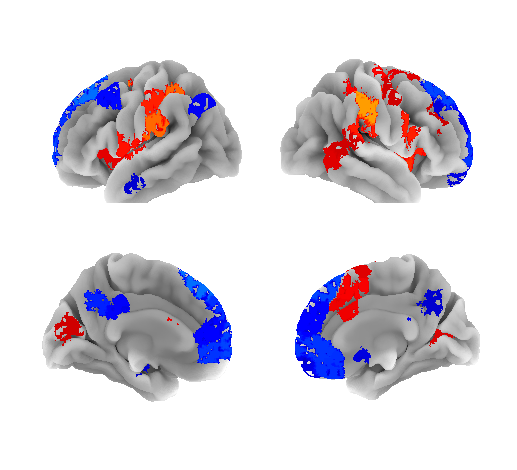

no significant results for: results/1stlevels/dataset-1/desc-Replicate-True/model-trialPrecursor
dataset-1_desc-Replicate-True_model-trialType_contrast-common_fail_datatype-edge.png
# sig ROIs: 29
medialfrontal: + 1 | - 0
frontalparietal: + 3 | - 3
default: + 0 | - 4
subcorticalcerebellar: + 5 | - 2
motor: + 9 | - 0
visual2: + 0 | - 0
visual1: + 0 | - 2
visualassociation: + 0 | - 0


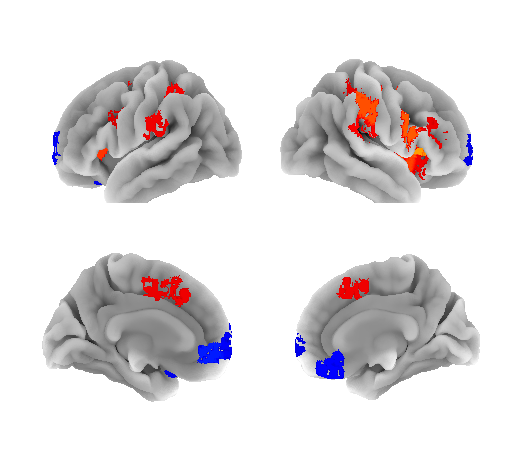

dataset-1_desc-Replicate-True_model-trialType_contrast-probe_fail+probe_success_datatype-edge.png
# sig ROIs: 100
medialfrontal: + 2 | - 12
frontalparietal: + 5 | - 11
default: + 0 | - 10
subcorticalcerebellar: + 18 | - 7
motor: + 6 | - 11
visual2: + 3 | - 0
visual1: + 0 | - 2
visualassociation: + 13 | - 0


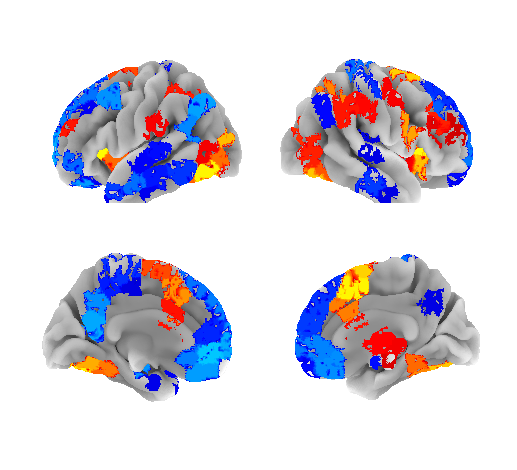

dataset-1_desc-Replicate-True_model-trialType_contrast-probe_fail_datatype-edge.png
# sig ROIs: 82
medialfrontal: + 2 | - 12
frontalparietal: + 4 | - 9
default: + 0 | - 9
subcorticalcerebellar: + 17 | - 4
motor: + 5 | - 7
visual2: + 3 | - 0
visual1: + 0 | - 1
visualassociation: + 9 | - 0


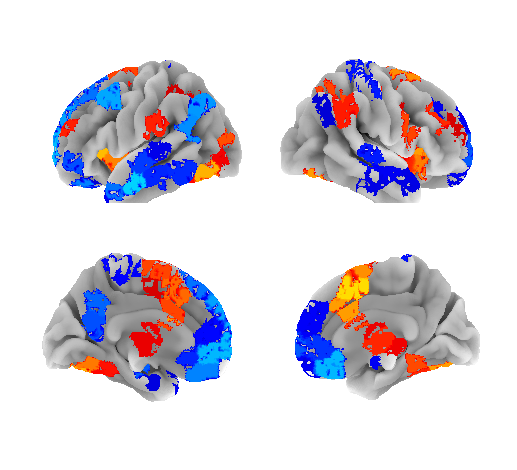

dataset-1_desc-Replicate-True_model-trialType_contrast-probe_success-probe_fail_datatype-edge.png
# sig ROIs: 12
medialfrontal: + 2 | - 0
frontalparietal: + 0 | - 0
default: + 0 | - 0
subcorticalcerebellar: + 1 | - 4
motor: + 3 | - 1
visual2: + 0 | - 0
visual1: + 0 | - 0
visualassociation: + 1 | - 0


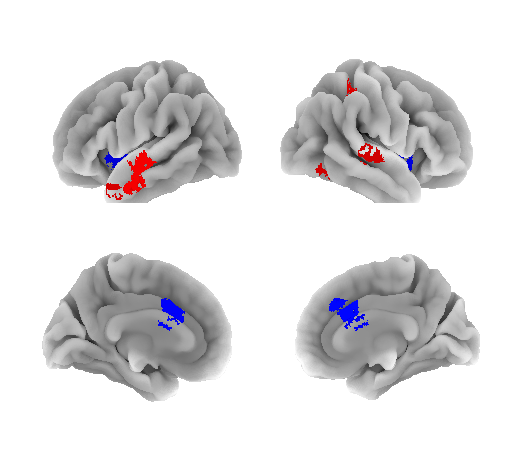

dataset-1_desc-Replicate-True_model-trialType_contrast-probe_success_datatype-edge.png
# sig ROIs: 85
medialfrontal: + 2 | - 10
frontalparietal: + 2 | - 11
default: + 0 | - 10
subcorticalcerebellar: + 14 | - 7
motor: + 4 | - 6
visual2: + 3 | - 1
visual1: + 0 | - 2
visualassociation: + 13 | - 0


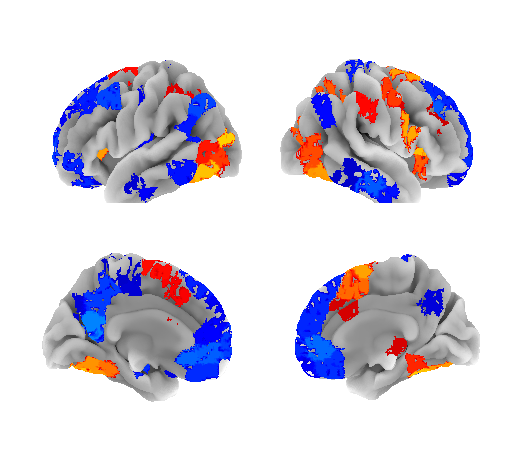

In [7]:
nan_policy = 'propagate' if args.drop_nan_nodes else 'omit'

for contrast_file in contrasts_files:
    contrast_name = contrast_file.split('_contrast-')[-1].split('_datatype')[0]

    outfile = path.join(secondlevel_dir, contrast_file.split('/')[-1])
    if (not path.exists(outfile)) or args.overwrite:
    
        con_data = pd.read_csv(contrast_file).values
        if not args.include_s7:
            con_data = np.delete(con_data, 6, axis=0)
        
        # observed results
        obs_res = ttest_1samp(con_data, popmean=0, axis=0, nan_policy='omit')
        obs_Fs = obs_res.statistic**2
        obs_ps = obs_res.pvalue

        # Permutation Distributions
        max_T_dist = np.full((args.n_perms, ), np.nan)
        random_intercepts = np.random.choice([1, -1], size=(con_data.shape[0], args.n_perms))  # make all the sign flips at once
        for perm_idx in range(args.n_perms):
            
            perm_data = con_data * random_intercepts[:, perm_idx, np.newaxis]
            perm_res = ttest_1samp(perm_data, popmean=0, axis=0, nan_policy=nan_policy)
            
            # max T
            max_T_dist[perm_idx] = np.nanmax(perm_res.statistic**2)
            
        
            
        # max T Thresholding 
        max_T_thresh = scoreatpercentile(max_T_dist, 100*(1-args.perm_p_thresh))
        max_T_thresholded_res = np.where(obs_Fs > max_T_thresh, obs_res.statistic.data, 0)
        pd.DataFrame(max_T_thresholded_res, columns=[contrast_name]).to_csv()
    else:
        max_T_thresholded_res = pd.read_csv(outfile).values[:,1]
    
    # visualizing results
    img_file_out = '_'.join(contrast_file.split('/')[2:5]).replace('.csv', '.png')
    
    if not np.all(max_T_thresholded_res==0):
        print(img_file_out)
        
        print(f'# sig ROIs: {(max_T_thresholded_res!=0).sum()}')
        for i, network in enumerate(network_names):
            net_idx = network_mappings==(i+1) 
            print(f'{network}: + {(max_T_thresholded_res[net_idx] > 0).sum()} | - {(max_T_thresholded_res[net_idx] < 0).sum()}')
            
        plot_surf(max_T_thresholded_res, img_file_out, threshold=np.min(np.abs(max_T_thresholded_res)[np.abs(max_T_thresholded_res) > 0]) - .01)

    else:
        print(f'no significant results for: {contrast_name}')

## Repeat with a colorbar that is symmetric around 0 for the manuscript - they are all the same

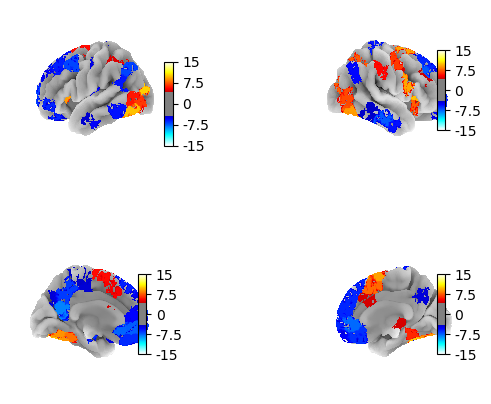

In [12]:
niimg = shen_mask.inverse_transform([max_T_thresholded_res])
    

fig, axes = plt.subplots(2,2, subplot_kw={'projection': '3d'})
for j, side in enumerate(['left', 'right']):
    bg_map = surface.load_surf_data(fsaverage[f"sulc_{side}"])
    for i, view in enumerate(['lateral', 'medial']):
        

        surf_data = surface.vol_to_surf(niimg,
            surf_mesh=fsaverage[f"pial_{side}"],
            inner_mesh=fsaverage[f"white_{side}"],
            interpolation='nearest'
        )

        fig = plotting.plot_surf_stat_map(
            fsaverage[f'pial_{side}'],
            surf_data,
            hemi=side,
            bg_map=bg_map,
            view=view,
            colorbar=True,
            axes=axes[i,j],
            vmax=15.05,
            threshold=np.min(np.abs(max_T_thresholded_res)[np.abs(max_T_thresholded_res) > 0]) - .01
        )
        plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


# plt.tight_layout()
plt.savefig('results/figures/eg_surfmap_wColorbar.png', bbox_inches="tight", dpi=400, transparent=True)
plt.show()
plt.close()

# load results to describe exact ROIs

In [9]:
contrast_res_df = pd.DataFrame()

for contrast_file in (contrasts_files[i] for i in [6,4,5,2,0]):
    contrast_name = contrast_file.split('_contrast-')[-1].split('_datatype')[0]
    curr_res = pd.read_csv(path.join(secondlevel_dir, contrast_file.split('/')[-1]), index_col=0)
    contrast_res_df=pd.concat([contrast_res_df, curr_res], axis=1)
    
contrast_res_df.index.names = ['ROI_num']
contrast_res_df.index += 1

In [10]:
contrast_res_df.loc[~(contrast_res_df==0).all(axis=1)].reset_index().to_csv(path.join(secondlevel_dir,f'dataset{args.dataset}_roi_replication_table.csv'), index=False)

In [11]:
contrast_res_df

,probe_success,probe_fail,probe_success-probe_fail,common_fail,VTCcorr
ROI_num,,,,,
1,-5.307759,-5.277831,0.0,0.000000,-4.824839
2,0.000000,0.000000,0.0,0.000000,0.000000
3,-6.533997,-9.541944,0.0,-5.422494,-6.546658
4,0.000000,0.000000,0.0,0.000000,0.000000
5,-7.829380,-6.638876,0.0,0.000000,-6.635903
...,...,...,...,...,...
264,0.000000,0.000000,0.0,0.000000,0.000000
265,0.000000,0.000000,0.0,0.000000,0.000000
266,0.000000,0.000000,0.0,0.000000,0.000000
